In [1]:
import os
import time

import matplotlib.pyplot as plt
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

In [2]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = "ad2b1d8267384aceb2f04586adf2723e"
endpoint = "https://cosminandrei-ai.cognitiveservices.azure.com//"
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

In [3]:
def images_reader():
    folder_path = "bikes"
    image_files = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            image_files.append(image_path)

    return image_files

In [4]:
image_files = images_reader()

In [5]:
def clasified_image(image_files):
    computedLabels = []
    for image in image_files:
        img = open(image, "rb")
        result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.tags,
                                                                                     VisualFeatureTypes.objects])

        computed_label = 'non-bike'

        for ob in result.objects:
            if (ob.object_property == "bike" or ob.object_property == "cycle" or ob.object_property == "cycling" or
                    ob.object_property == "bicycle" or ob.object_property == "bikes"):
                computed_label = 'bike'

        computedLabels.append(computed_label)

    realLabels = ['bike', 'bike', 'bike', 'bike', 'bike', 'bike', 'bike', 'bike', 'bike', 'bike', 'non-bike',
                  'non-bike', 'non-bike', 'non-bike', 'non-bike', 'non-bike', 'non-bike', 'non-bike', 'non-bike',
                  'non-bike']
    labelNames = ['bike', 'non-bike']

    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

    cm = confusion_matrix(realLabels, computedLabels, labels=labelNames)
    acc = accuracy_score(realLabels, computedLabels)
    precision = precision_score(realLabels, computedLabels, average=None, labels=labelNames)
    recall = recall_score(realLabels, computedLabels, average=None, labels=labelNames)
    return acc, precision, recall


acc, prec, recall = clasified_image(image_files)
print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)

acc:  0.95  precision:  [1.         0.90909091]  recall:  [0.9 1. ]


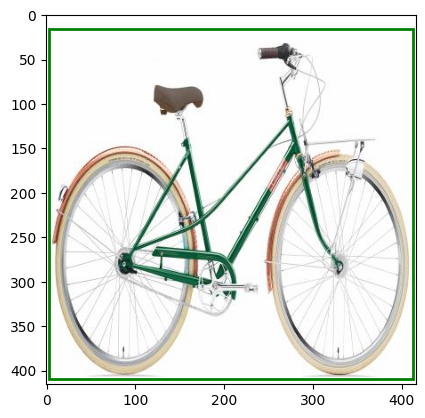

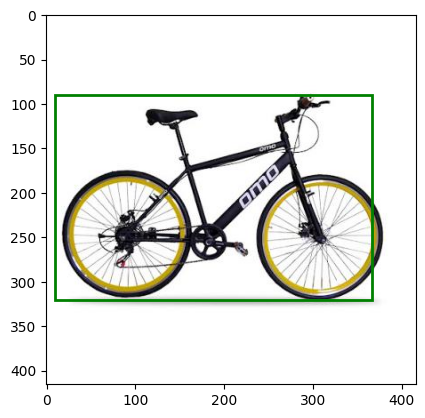

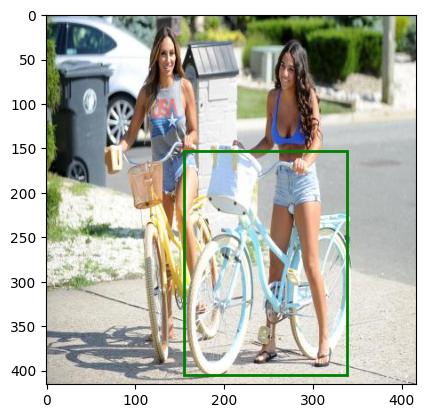

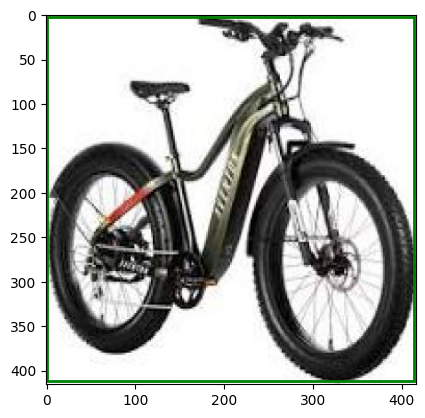

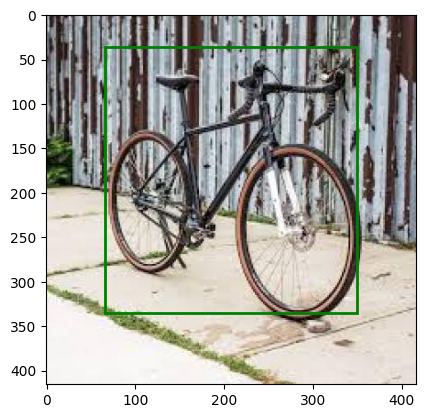

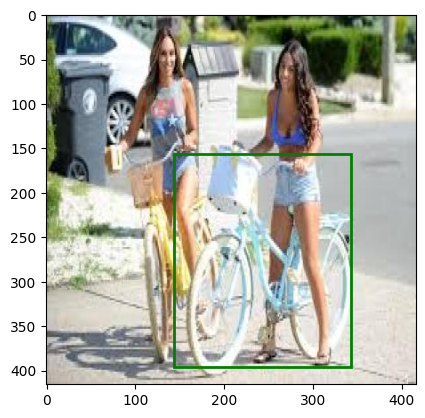

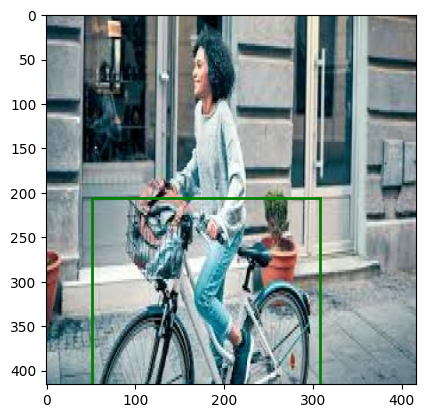

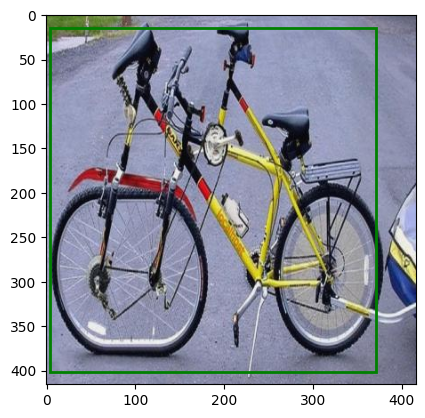

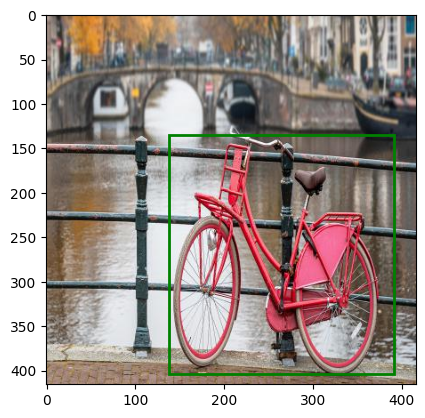

In [6]:
def plotLocalization(image_files):
    predictedBoxes = []
    for image in image_files:
        predicted_bike = []
        ok = 0
        img = open(image, "rb")
        result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.objects])
        for ob in result.objects:
            if (ob.object_property == "bike" or ob.object_property == "cycle" or ob.object_property == "cycling" or
                    ob.object_property == "bicycle" or ob.object_property == "bikes"):
                ok = 1
                predicted_bike = [ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w,
                                  ob.rectangle.y + ob.rectangle.h]
                predictedBoxes.append(predicted_bike)

        if ok == 1:
            im = plt.imread(image)
            fig = plt.imshow(im)
            fig.axes.add_patch(plt.Rectangle(xy=(predicted_bike[0], predicted_bike[1]),
                                             width=predicted_bike[2] - predicted_bike[0],
                                             height=predicted_bike[3] - predicted_bike[1], fill=False, color="green",
                                             linewidth=2))

            plt.show()

    return predictedBoxes


predictedBoxes = plotLocalization(image_files)

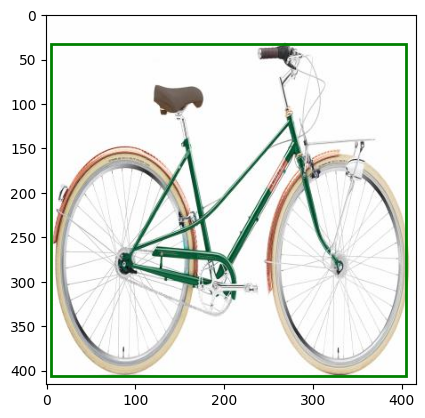

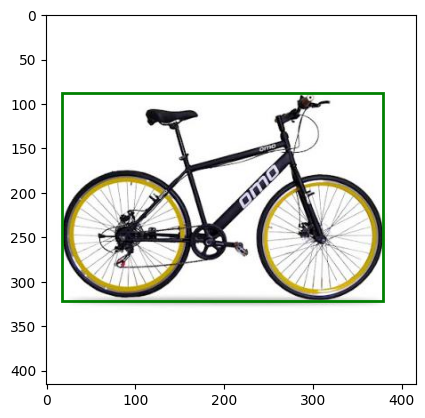

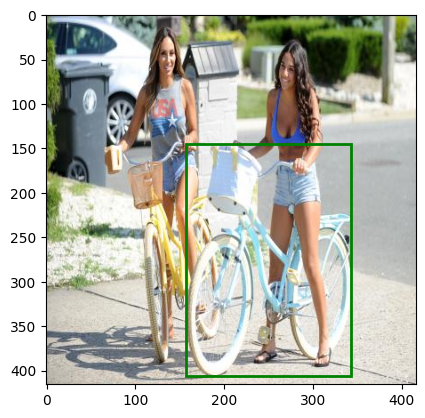

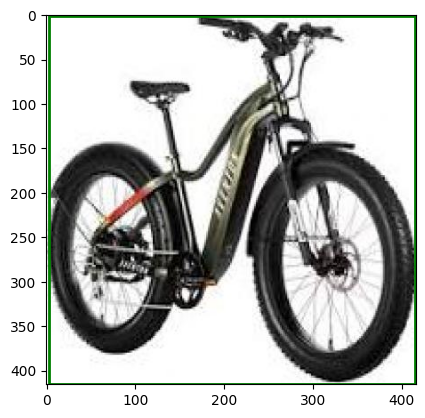

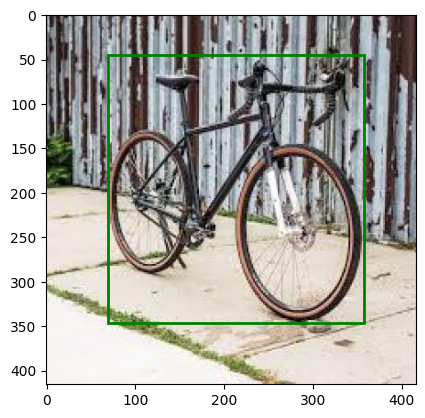

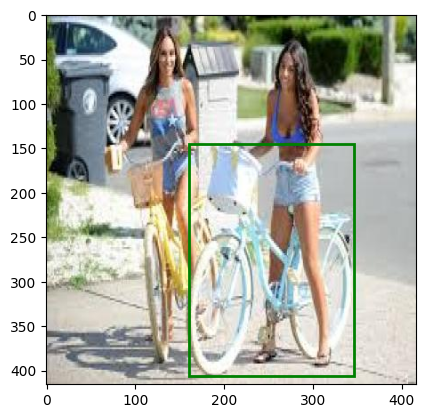

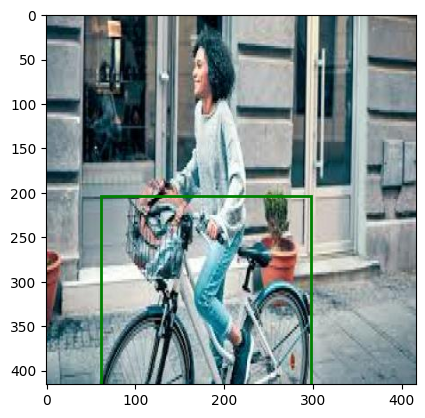

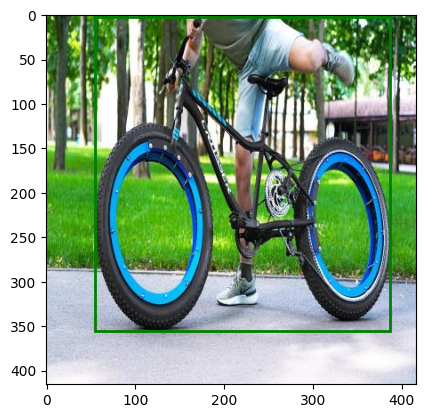

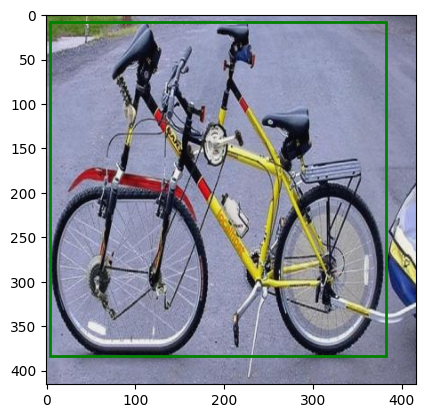

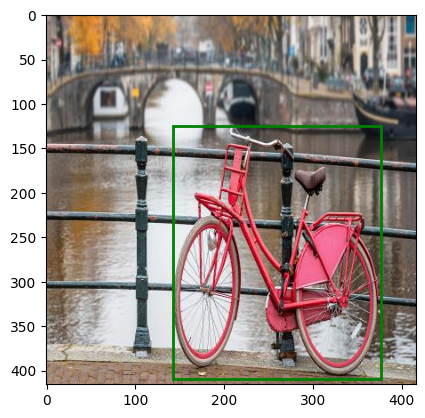

In [7]:
def plotManual(image_files):
    boxes = [
        [5, 32, 400, 374],
        [17, 88, 362, 234],
        [157, 145, 186, 261],
        [3, 1, 412, 414],
        [69, 45, 288, 301],
        [160, 145, 186, 261],
        [61, 204, 237, 212],
        [54, 2, 333, 353],
        [4, 8, 378, 376],
        [142, 125, 234, 284]
    ]

    for i, image in enumerate(image_files[:10], start=0):
        im = plt.imread(image)
        fig = plt.imshow(im)
        fig.axes.add_patch(plt.Rectangle(xy=(boxes[i][0], boxes[i][1]),
                                         width=boxes[i][2],
                                         height=boxes[i][3], fill=False, color="green",
                                         linewidth=2))

        plt.show()
        i = i + 1


plotManual(image_files)

picture nr  1
detection error  425.0
picture nr  2
detection error  1913.25
picture nr  3
detection error  10977.0
picture nr  4
detection error  4.5
picture nr  5
detection error  1241.75
picture nr  6
detection error  10821.0
picture nr  7
detection error  11690.25
picture nr  9
detection error  8759.5


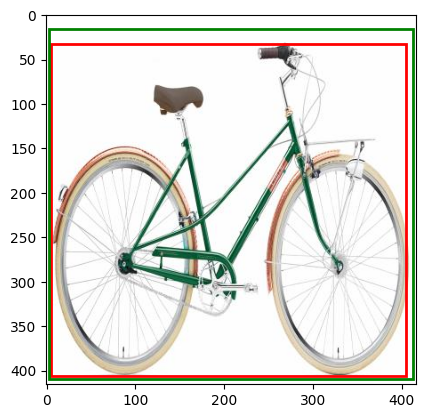

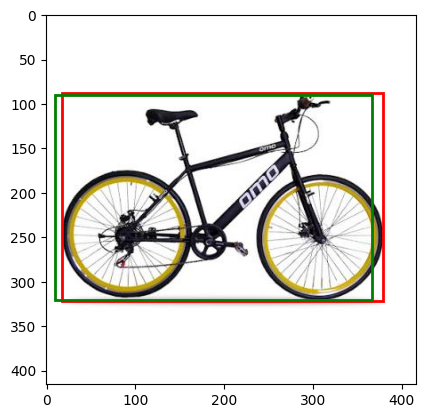

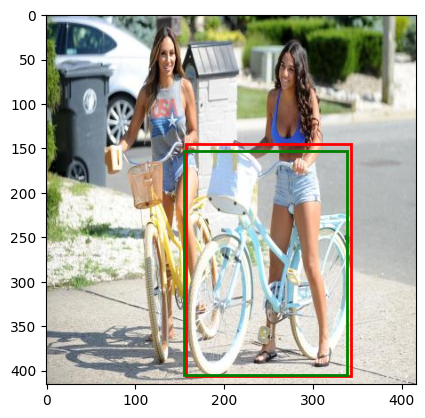

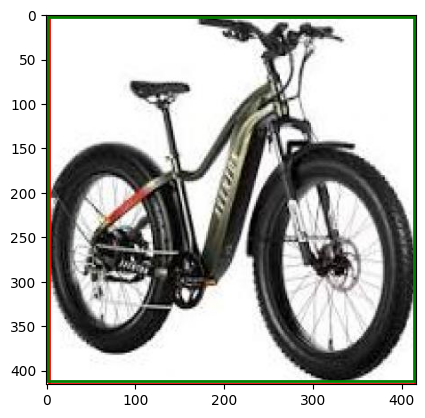

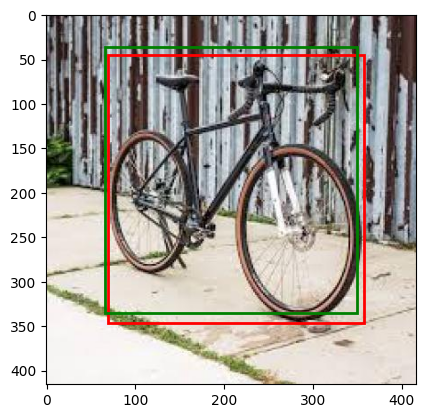

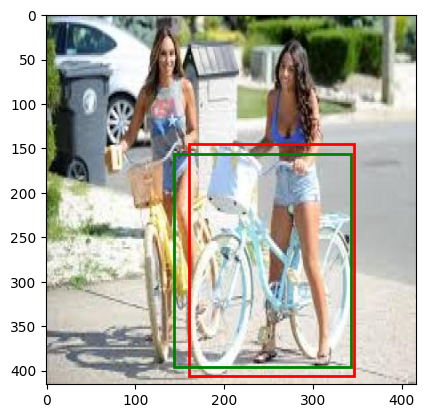

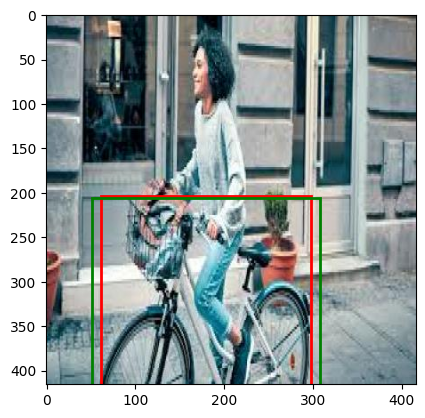

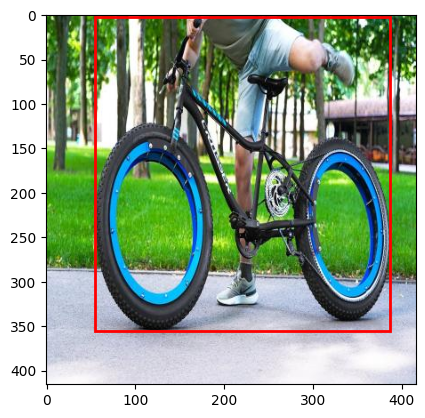

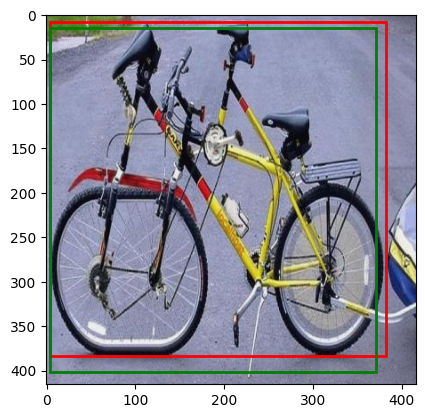

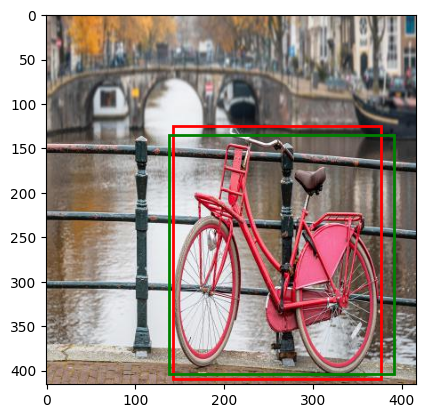

In [18]:
def quality(realBoxes, predictedBoxes, image_files):
    i = 0
    while i < 7:
        err = 0
        for v in zip(predictedBoxes[i], realBoxes[i]):
            err = err + (v[0] - v[1]) ** 2
        err /= 4
        print("picture nr ", i + 1)
        print("detection error ", err)
        i = i + 1

    i = i + 1
    while i < 9:
        err = 0
        for v in zip(predictedBoxes[i], realBoxes[i]):
            err = err + (v[0] - v[1]) ** 2
        err /= 4
        print("picture nr ", i + 1)
        print("detection error ", err)
        i = i + 1

    for i, image in enumerate(image_files[:10], start=0):

        im = plt.imread(image)
        fig = plt.imshow(im)
        fig.axes.add_patch(plt.Rectangle(xy=(realBoxes[i][0], realBoxes[i][1]),
                                         width=realBoxes[i][2],
                                         height=realBoxes[i][3], fill=False, color="red",
                                         linewidth=2))
        if i < 7:
            fig.axes.add_patch(plt.Rectangle(xy=(predictedBoxes[i][0], predictedBoxes[i][1]),
                                             width=predictedBoxes[i][2] - predictedBoxes[i][0],
                                             height=predictedBoxes[i][3] - predictedBoxes[i][1], fill=False,
                                             color="green",
                                             linewidth=2))
        if i > 7:
            fig.axes.add_patch(plt.Rectangle(xy=(predictedBoxes[i - 1][0], predictedBoxes[i - 1][1]),
                                             width=predictedBoxes[i - 1][2] - predictedBoxes[i - 1][0],
                                             height=predictedBoxes[i - 1][3] - predictedBoxes[i - 1][1], fill=False,
                                             color="green",
                                             linewidth=2))

        plt.show()


realBoxes = [
    [5, 32, 400, 374],
    [17, 88, 362, 234],
    [157, 145, 186, 261],
    [3, 1, 412, 414],
    [69, 45, 288, 301],
    [160, 145, 186, 261],
    [61, 204, 237, 212],
    [54, 2, 333, 353],
    [4, 8, 378, 376],
    [142, 125, 234, 284]
]
quality(realBoxes, predictedBoxes, image_files)

In [20]:
from cmath import sqrt

# compute the prediction error

# MAE
errorL1 = sum(abs(r[0] - c[0]) + abs(r[1] - c[1]) + abs(r[2]-c[2]) + abs(r[3]-c[3]) for r, c in zip(realBoxes, predictedBoxes)) / len(realBoxes)
print('Error (L1): ', errorL1)

# RMSE
errorL2 = sqrt(sum(((r[0] - c[0]) ** 2 + (r[1] - c[1]) ** 2 + (r[2] - c[2]) ** 2 + (r[3] - c[3]) ** 2) for r, c in zip(realBoxes, predictedBoxes))/ len(realBoxes))
print('Error (L2): ', errorL2)

Error (L1):  164.6
Error (L2):  (137.77445336491087+0j)
